# # Importing Useful Packages

First is importing some of the packages we need

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
plt.style.use("seaborn-colorblind")
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf


Read the FIFA file after downloading the dataset from Kaggle and saved on my file

In [2]:
fifa = pd.read_csv("FIFA.csv")

# Exploratory Data Analysis

Display the first five rows

In [3]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Obviously, I have to remove '*Unnamed:0*' and '*ID*' columns since they are cannot tell us anything

Check the *datatypes*

In [4]:
fifa.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

Check the *shapes* of the dataset

In [5]:
fifa.shape

(18207, 89)

And the rest of the columns

In [6]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

Describe the datasets

In [7]:
fifa.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


In [8]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [9]:
#fifa.dtypes

In [10]:
#Determine the number of categorical and non categorical variables
print('Number of categorical variable: ', len(fifa.select_dtypes(include=object).columns))
print('Number of numerical variable: ', len(fifa.select_dtypes(exclude=object).columns))

Number of categorical variable:  45
Number of numerical variable:  44


From the above, there are obviously two data types: numeric and object

# **Data Cleaning/Wrangling/Pre-processing**

First: Drop the columns that are less relevant to the predictions.

In [11]:
fifa.drop(columns=['Unnamed: 0', 'Photo', 'Flag', 'Club Logo', 'Special', 'Real Face',
                   'Joined', 'Contract Valid Until'], inplace=True)
fifa.head() # View the result of the operations

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,NaN,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,NaN,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,NaN,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,NaN,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,NaN,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


After dropping the columns. We now have 81 instead of 89.

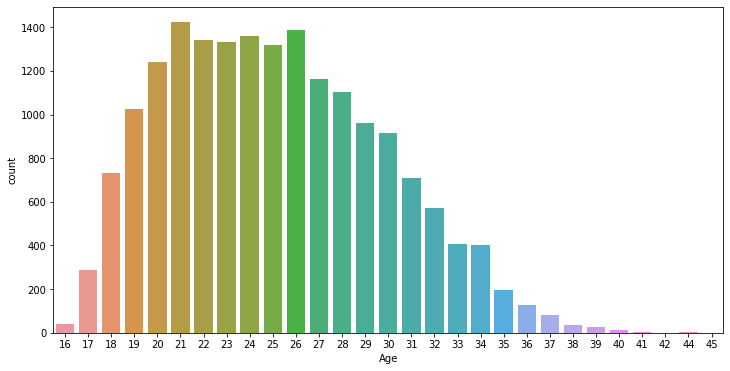

In [12]:
#Some visualizations
plt.figure(figsize=(12,6))
sns.countplot(x='Age', data=fifa)

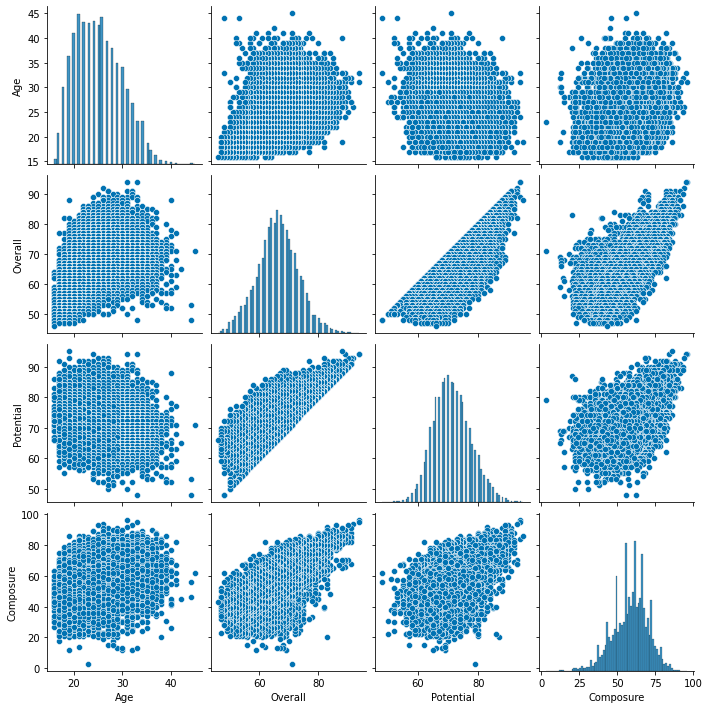

In [13]:
#Correlation
sns.pairplot(fifa[['Age','Overall', 'Potential', 'Composure']])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



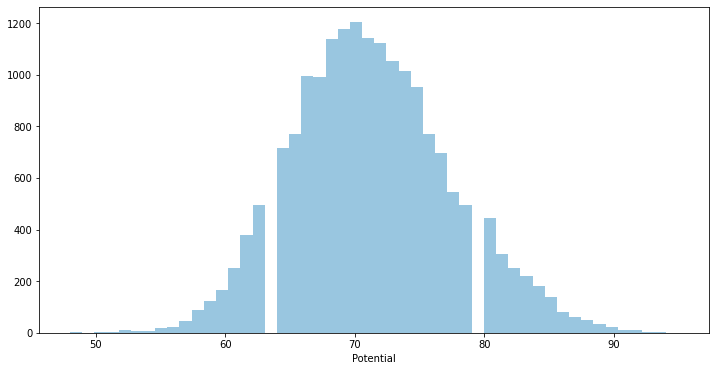

In [14]:
#Explore Potential features using seaborn distplot
plt.figure(figsize=(12,6))
sns.distplot(fifa['Potential'], kde=False, bins=50)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



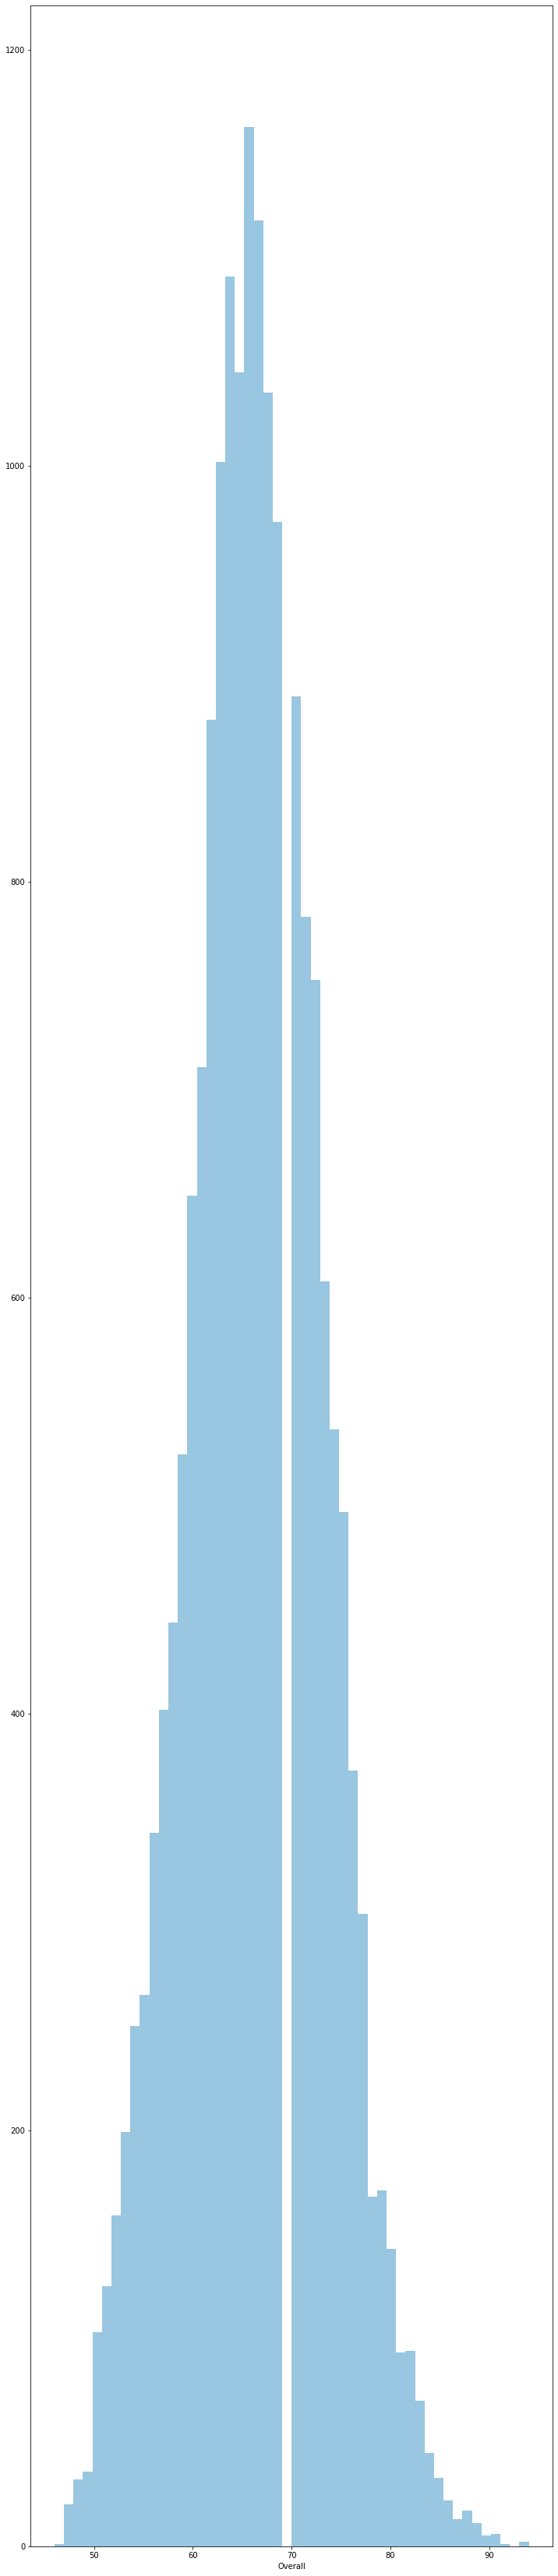

In [15]:
#do same for Overall
plt.figure(figsize=(12,60))
sns.distplot(fifa['Overall'], kde=False, bins=50)

In [16]:
#Get a correlation of the dataset
fifa.corr()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,1.000000,-0.739208,-0.417025,0.047074,-0.356191,-0.075784,-0.056914,0.182074,-0.131994,-0.082323,-0.106815,-0.136279,-0.159915,-0.030340,-0.169511,-0.199549,-0.186764,-0.100184,0.133236,0.132437,-0.019897,-0.408617,0.048463,-0.166133,-0.169369,-0.053895,-0.259756,-0.161549,-0.228329,-0.160602,-0.088330,-0.215170,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.739208,1.000000,0.452350,-0.253312,0.253765,0.059867,0.027649,-0.241156,0.130545,0.068660,0.147183,0.132894,0.142472,0.010166,0.143276,0.193467,0.181310,0.084969,-0.158667,-0.151682,-0.019395,0.453124,-0.089877,0.156947,0.177167,0.097793,0.332798,0.155096,0.265190,0.197845,0.082443,0.187422,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.417025,0.452350,1.000000,0.660939,0.499491,0.212015,0.414463,-0.218931,0.394972,0.332515,0.340776,0.502550,0.391338,0.372426,0.419491,0.396892,0.483909,0.460197,0.196869,0.210647,0.264952,0.850045,0.103160,0.441118,0.264435,0.365656,0.349326,0.420795,0.395470,0.321326,0.356493,0.498894,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,0.047074,-0.253312,0.660939,1.000000,0.372993,0.162346,0.354290,-0.010474,0.246319,0.243355,0.200988,0.369189,0.254906,0.315019,0.279944,0.230544,0.321437,0.354396,0.234608,0.236771,0.222310,0.513425,0.138025,0.288318,0.109151,0.202563,0.075769,0.266740,0.171174,0.154908,0.245616,0.348141,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
International Reputation,-0.356191,0.253765,0.499491,0.372993,1.000000,0.128317,0.208153,-0.077298,0.191770,0.178373,0.157483,0.242803,0.243089,0.179041,0.233681,0.223564,0.239525,0.217946,0.044319,0.044070,0.100869,0.445614,0.050076,0.227772,0.120931,0.094780,0.131280,0.213960,0.173327,0.129586,0.183003,0.284600,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.075784,0.059867,0.212015,0.162346,0.128317,1.000000,0.340721,-0.035410,0.307925,0.357416,0.183238,0.322133,0.357340,0.352658,0.345468,0.330472,0.277174,0.356383,0.261435,0.248822,0.302062,0.201341,0.254022,0.332855,0.069752,0.232094,-0.008470,0.355967,0.131524,0.053097,0.346896,0.337897,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.056914,0.027649,0.414463,0.354290,0.208153,0.340721,1.000000,-0.035194,0.741035,0.743439,0.443005,0.730363,0.745077,0.839757,0.771052,0.701068,0.622342,0.818051,0.652356,0.624098,0.681765,0.377044,0.578459,0.718237,0.107553,0.570226,-0.041475,0.752980,0.347795,0.209604,0.781248,0.674057,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Jersey Number,0.182074,-0.241156,-0.218931,-0.010474,-0.077298,-0.035410,-0.035194,1.000000,-0.076585,-0.006639,-0.091688,-0.100241,-0.026731,-0.028021,-0.055428,-0.068843,-0.117424,-0.073210,-0.004395,-0.015069,-0.034158,-0.192622,0.008009,-0.053860,-0.104179,-0.127822,-0.158411,-0.046174,-0.146907,-0.158526,-0.025422,-0.078050,-0.028023,-0.167523,-0.142474,-0.133285,-0.124610,0.004807,0.001543,0.001162,-0.002736,0.003255
Crossing,-0.131994,0.130545,0.394972,0.246319,0.191770,0.307925,0.741035,-0.076585,1.000000,0.655300,0.469507,0.809660,0.690339,0.856647,0.833105,0.761107,0.756527,0.840916,0.668365,0.645578,0.698320,0.389574,0.618280,0.705503,0.135486,0.672633,-0.029403,0.742065,0.473570,0.427739,0.783185,0.684948,0.645805,0.575446,0.443101,0.42896

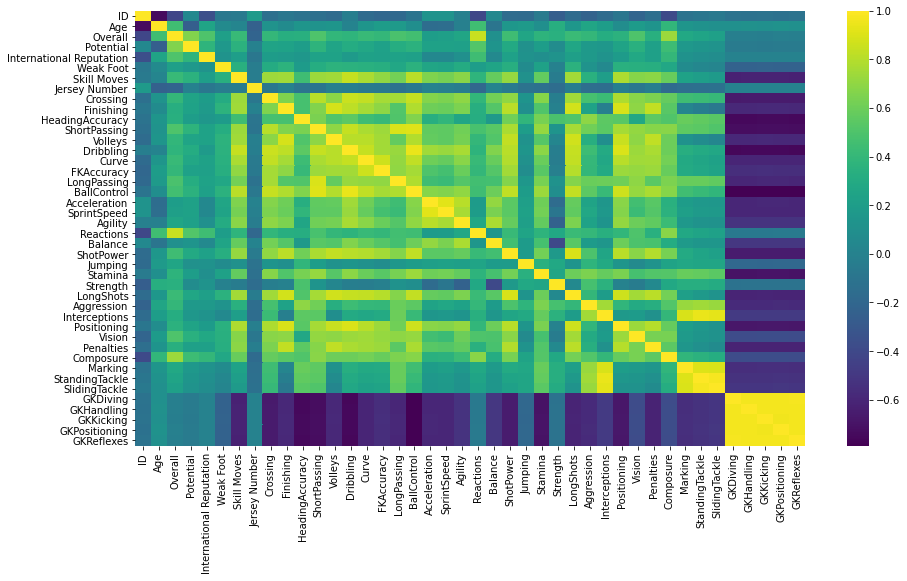

In [17]:
#Visualize using heatmap
plt.figure(figsize=(15,8))
sns.heatmap(fifa.corr(), cmap='viridis')

Checking and treating missing values

In [18]:
fifa.isnull()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Fals

Find the columns that have nans-missing data types

In [19]:
for col in fifa.columns:
    print("Number of Nans in ",col,"is ==",fifa[col].isna().sum())

Number of Nans in  ID is == 0
Number of Nans in  Name is == 0
Number of Nans in  Age is == 0
Number of Nans in  Nationality is == 0
Number of Nans in  Overall is == 0
Number of Nans in  Potential is == 0
Number of Nans in  Club is == 241
Number of Nans in  Value is == 0
Number of Nans in  Wage is == 0
Number of Nans in  Preferred Foot is == 48
Number of Nans in  International Reputation is == 48
Number of Nans in  Weak Foot is == 48
Number of Nans in  Skill Moves is == 48
Number of Nans in  Work Rate is == 48
Number of Nans in  Body Type is == 48
Number of Nans in  Position is == 60
Number of Nans in  Jersey Number is == 60
Number of Nans in  Loaned From is == 16943
Number of Nans in  Height is == 48
Number of Nans in  Weight is == 48
Number of Nans in  LS is == 2085
Number of Nans in  ST is == 2085
Number of Nans in  RS is == 2085
Number of Nans in  LW is == 2085
Number of Nans in  LF is == 2085
Number of Nans in  CF is == 2085
Number of Nans in  RF is == 2085
Number of Nans in  RW is

*Loaned From* column has the highest percentage of missing data-93%. So it should be dropped. This is followed by different positions-LDM,CDM, etc. These later should just have the 'nan' rows dropped instead of the entire column.

In [20]:
fifa.drop('Loaned From', inplace=True, axis=1)
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [21]:
#Players who are not part of any club. we fill with 'No Club'
fifa['Club'].fillna(value='No Club', inplace=True)

In [22]:
#Also, drop the index of the missing value since there is no way to fix it
fifa.drop(index=fifa[fifa['Preferred Foot'].isna()].index, inplace=True)

In [23]:
fifa[fifa['Position'].isna()][['Name', 'Nationality', 'LS', 'ST','RS', 'LW', 'LF', 'CF', 'RF', 'RW',
                              'LAM', 'CAM', 'RAM', 'LM', 'LCM','CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 
                              'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,Name,Nationality,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
5018,R. Raldes,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6736,J. Arce,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7922,L. Gutiérrez,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9905,R. Vargas,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10628,D. Bejarano,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Treating columns with currency and others like weight
#View some monetary(Value, Wage) columns and others like Weight. 
fifa[['Value','Wage','Weight','Height']].head()

,Value,Wage,Weight,Height
0,€110.5M,€565K,159lbs,5'7
1,€77M,€405K,183lbs,6'2
2,€118.5M,€290K,150lbs,5'9
3,€72M,€260K,168lbs,6'4
4,€102M,€355K,154lbs,5'11


In [25]:
#It's pretty obvious that they can't be used this way, so they will have to converted into 
#purely numeric field. Starting with *'Value','Wage' and Release Clause*
#Starting with 'Value'
fifa["Value"] = fifa["Value"].str.replace('€', '')
fifa["Value"] = (fifa["Value"].replace(r'[KM]+$', '', regex=True).astype(float) * \
             fifa["Value"].str.extract(r'[\d\.]+([KM]+)', expand=False)
          .fillna(1)
          .replace(['K','M'], [10**3, 10**6]).astype(int))
#Do for Release Clause
fifa["Release Clause"] = fifa["Release Clause"].str.replace('€', '')
fifa["Release Clause"] = (fifa["Release Clause"].replace(r'[KM]+$', '', regex=True).astype(float) * \
             fifa["Release Clause"].str.extract(r'[\d\.]+([KM]+)', expand=False)
          .fillna(1)
          .replace(['K','M'], [10**3, 10**6]).astype(int))


#Do the same for 'Wage'
fifa["Wage"] = fifa["Wage"].str.replace('€', '')
fifa["Wage"] = (fifa["Wage"].replace(r'[KM]+$', '', regex=True).astype(float) * \
             fifa["Wage"].str.extract(r'[\d\.]+([KM]+)', expand=False)
          .fillna(1)
          .replace(['K','M'], [10**3, 10**6]).astype(int))
#Replace 'lbs' inside 'Weight' column with empty character
fifa["Weight"] = fifa["Weight"].str.replace('lbs', '').astype(int);
fifa[['Value','Wage','Weight','Height']].head()

,Value,Wage,Weight,Height
0,110500000.0,565000.0,159,5'7
1,77000000.0,405000.0,183,6'2
2,118500000.0,290000.0,150,5'9
3,72000000.0,260000.0,168,6'4
4,102000000.0,355000.0,154,5'11


In [26]:
#Now convert the 'Height' feets and inche to numeric- float. This can be achieved with regular expression.
#import regular expression
import re
regx = re.compile(r"([0-9]+)'([0-9]*\.?[0-9]+)")
def get_inches(el):
    m = regx.match(el)
    if m == None:
        return float('NaN')
    else:
        return int(m.group(1))*12 + float(m.group(2))

fifa["Height"] = fifa["Height"].apply(get_inches).astype(float)
fifa[['Value','Wage','Weight','Height']].head()

,Value,Wage,Weight,Height
0,110500000.0,565000.0,159,67.0
1,77000000.0,405000.0,183,74.0
2,118500000.0,290000.0,150,69.0
3,72000000.0,260000.0,168,76.0
4,102000000.0,355000.0,154,71.0


In [27]:
#Again, drop the index of the missing values because we can't fill it
fifa.drop(index = fifa[fifa['Position'].isna()].index, inplace=True)

In [28]:
#check the number of remaining missing values
fifa.isnull().sum()[fifa.isnull().sum() > 0]

LS                2025
ST                2025
RS                2025
LW                2025
LF                2025
CF                2025
RF                2025
RW                2025
LAM               2025
CAM               2025
RAM               2025
LM                2025
LCM               2025
CM                2025
RCM               2025
RM                2025
LWB               2025
LDM               2025
CDM               2025
RDM               2025
RWB               2025
LB                2025
LCB               2025
CB                2025
RCB               2025
RB                2025
Release Clause    1504
dtype: int64

In [29]:
#Fill in a the missing values in Release clause with the average
fifa['Release Clause'].fillna(value = fifa['Release Clause'].mean(), inplace = True)

In [30]:
len(fifa[fifa['Position'] == 'GK'])

2025

In [31]:
#Since we can't drop the missing values in that LS, LWD etc, else it will affect the GK, we have to fill them with zeros
fifa.fillna(value = 0, inplace = True)

In [32]:
#check to see if there are still missing values
fifa.isnull().sum().sum()

0

After dealing with missing values. Now let's see the head of our dataframe again

In [33]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,67.0,159,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,74.0,183,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,69.0,150,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,76.0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,71.0,154,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


Exploring all categorical columns

In [34]:
categoric_columns = fifa.select_dtypes(exclude =['number']).columns
print("Length of Categorical Columns ==",len(list(categoric_columns)))
print(list(categoric_columns))

Lent of Categorical Columns == 33
['Name', 'Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Position', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']


In [35]:
#Displaying the head of the positions columns and convert to numerical values
fifa[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [36]:
#Now, let's convert to numerical
def convert_rating(val):
    if type(val) == str:
        pos_1 = val[0:2]
        pos_2 = val[-1]
        val = int(pos_1) + int(pos_2)
        return val
    else:
        return val

In [37]:
pos_cols = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
for col in pos_cols:
    fifa[col] = fifa[col].apply(convert_rating)

In [38]:
fifa[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61
1,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64
2,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76


In [39]:
#Exploring body type and work rate
fifa['Body Type'].unique()

#let's fix it with different body types assigned arbitrily based on the player's physique
fifa['Body Type'][fifa['Body Type'] == 'Messi'] = 'Lean'
fifa['Body Type'][fifa['Body Type'] == 'C. Ronaldo'] = 'Normal'
fifa['Body Type'][fifa['Body Type'] == 'Neymar'] = 'Lean'
fifa['Body Type'][fifa['Body Type'] == 'Courtois'] = 'Lean'
fifa['Body Type'][fifa['Body Type'] == 'PLAYER_BODY_TYPE_25'] = 'Normal'
fifa['Body Type'][fifa['Body Type'] == 'Shaqiri'] = 'Stocky'
fifa['Body Type'][fifa['Body Type'] == 'Akinfenwa'] = 'Stocky'


In [40]:
#For easy understanding, I categorize the positions into four categories of Forwards, Midfielders, Defenders and GoalKeepers
print(fifa['Position'].unique())
#print(fifa['Position'].nunique())

['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB']


In [41]:
#Categorizing them into four categories
def position_category(pos):
    if pos == 'RF' or pos == 'ST' or pos == 'LF' or pos == 'RS' \
    or pos == 'CF' or pos == 'LS':
        pos = 'F'
        return pos
    elif pos == 'LW' or pos == 'RCM'  or pos =='LCM' or pos == 'LDM' \
    or pos == 'CAM' or pos == 'CDM' or pos == 'RM' or pos == 'LAM' \
    or pos == 'LM' or pos == 'RDM' or pos == 'RW' or pos == 'CM' or pos == 'RAM':
        pos = 'M'
        return pos
    elif pos == 'RCB' or pos == 'CB' or pos == 'LCB' or pos == 'LB'\
    or pos == 'RB' or pos == 'RWB' or pos == 'LWB':
        pos = 'D'
        return pos
    else:
        return pos

In [42]:
#apply to the position
fifa['Position'] = fifa['Position'].apply(position_category)
fifa['Position'].value_counts()

M     7589
D     5866
F     2667
GK    2025
Name: Position, dtype: int64

In [43]:
fifa['Position'].unique()

array(['F', 'M', 'GK', 'D'], dtype=object)

Let me use the box plot to visualize the relationships between the categorical variables to our target/dependent variable 'Overall'

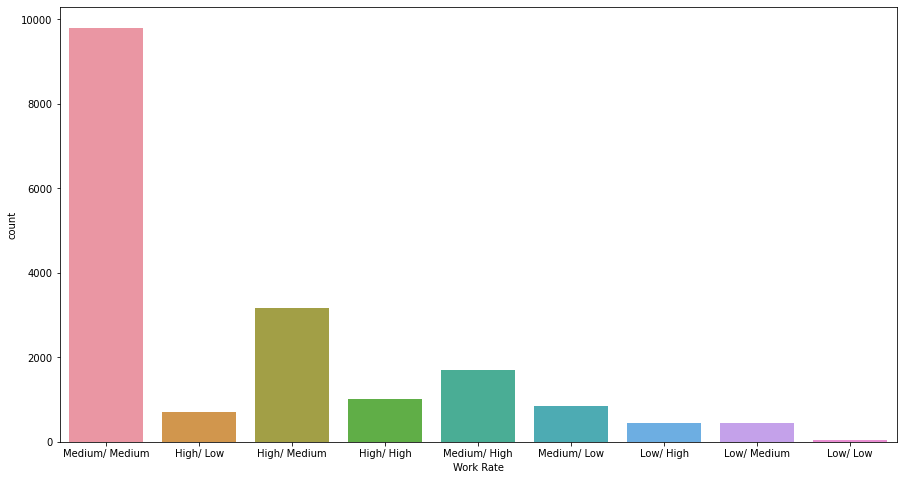

In [44]:
plt.figure(figsize=(15,8))
sns.countplot(x='Work Rate', data=fifa)

In [45]:
#Since Work rate has multiple categorical features, it can not be encoded, so drop
fifa.drop('Work Rate', axis=1, inplace=True)

In [46]:
#fifa['Club'].unique()
#fifa['Nationality'].unique()

In [47]:
#club and names are so many, drop them since they can't encoded them
fifa.drop(['Club', 'Name'], axis=1, inplace=True)

In [48]:
fifa.select_dtypes(include =['object'])

,Nationality,Preferred Foot,Body Type,Position
0,Argentina,Left,Lean,F
1,Portugal,Right,Normal,F
2,Brazil,Right,Lean,M
3,Spain,Right,Lean,GK
4,Belgium,Right,Normal,M
...,...,...,...,...
18202,England,Right,Lean,M
18203,Sweden,Right,Normal,F
18204,England,Right,Normal,F
18205,England,Right,Lean,M


Use boxplot to visualize some of them like Preferred Foot and BodyType

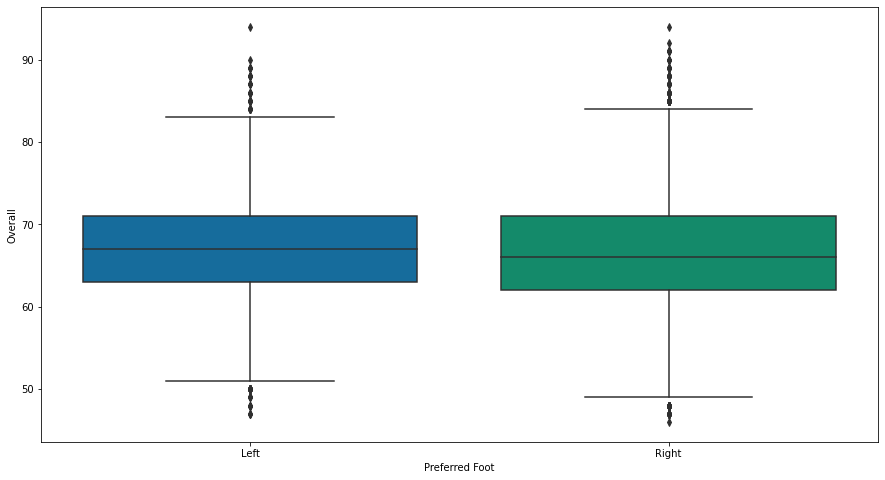

In [49]:
fig = plt.figure(figsize =(15,8))
sns.boxplot(x ="Preferred Foot", y ="Overall", data = fifa)

In [50]:
#Use iplot to visualize distribtion of players according to postion
player_pos = go.Pie(values = fifa['Position'].value_counts(),
                   labels = fifa['Position'].value_counts().index.values)
layout = go.Layout(title = 'Distribution of Players by Position')
fig = go.Figure(data = [player_pos], layout = layout)
py.iplot(fig)

What of Body Type

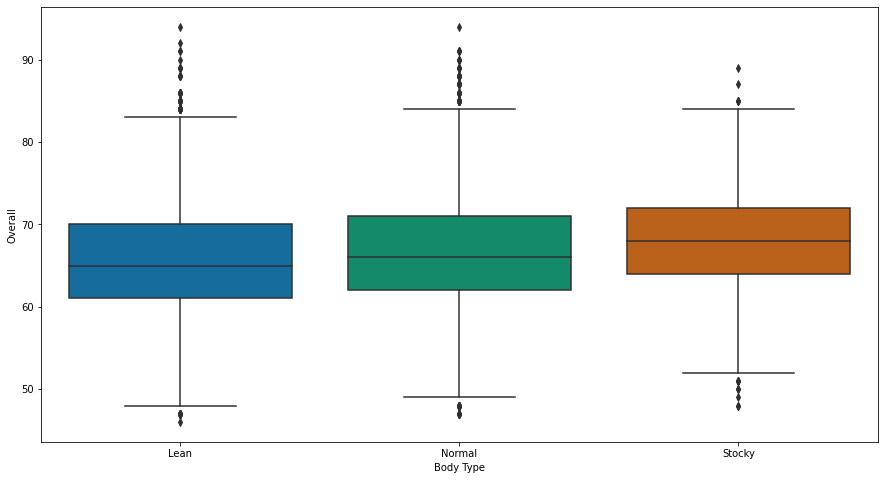

In [51]:
fig = plt.figure(figsize = (15,8))
sns.boxplot(x ="Body Type", y ="Overall", data = fifa)

Work Rate?

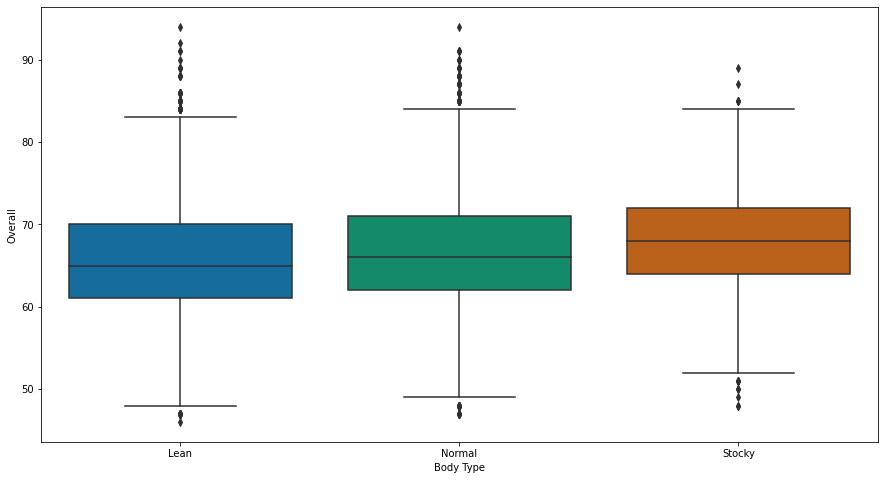

In [52]:
fig = plt.figure(figsize =(15,8))
sns.boxplot(x ="Body Type", y ="Overall", data = fifa)

Displaying dataframe for categorical varibles again:

In [53]:
fifa.select_dtypes(include =['object'])

,Nationality,Preferred Foot,Body Type,Position
0,Argentina,Left,Lean,F
1,Portugal,Right,Normal,F
2,Brazil,Right,Lean,M
3,Spain,Right,Lean,GK
4,Belgium,Right,Normal,M
...,...,...,...,...
18202,England,Right,Lean,M
18203,Sweden,Right,Normal,F
18204,England,Right,Normal,F
18205,England,Right,Lean,M


Let's visualize the 'Position' column 

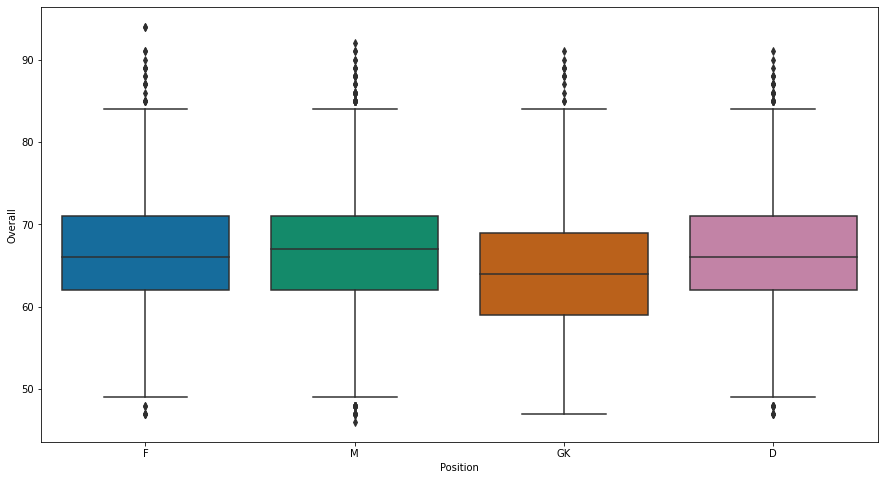

In [54]:
fig = plt.figure(figsize = (15,8))
sns.boxplot(x = "Position", y = "Overall", data = fifa)

# Encoding Categorical Data

Continuing with the cleaning and feature engineering. Let's encode these categorical variables using onehot encoding.

In [55]:
dummy_col = ['Preferred Foot', 'Body Type', 'Position']
encode_fifa = pd.get_dummies(fifa[dummy_col], drop_first=True)

encode_fifa.head()

,Preferred Foot_Right,Body Type_Normal,Body Type_Stocky,Position_F,Position_GK,Position_M
0,0,0,0,1,0,0
1,1,1,0,1,0,0
2,1,0,0,0,0,1
3,1,0,0,0,1,0
4,1,1,0,0,0,1


In [56]:
#Join the two dataframe and drop the categorical columns
fifa_final = pd.concat([fifa.drop(columns = dummy_col), encode_fifa], axis = 1)

In [57]:
#display the head of final dataframe
fifa_final.head()

,ID,Age,Nationality,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Preferred Foot_Right,Body Type_Normal,Body Type_Stocky,Position_F,Position_GK,Position_M
0,158023,31,Argentina,94,94,110500000.0,565000.0,5.0,4.0,4.0,10.0,67.0,159,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,0,0,0,1,0,0
1,20801,33,Portugal,94,94,77000000.0,405000.0,5.0,4.0,5.0,7.0,74.0,183,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,1,1,0,1,0,0
2,190871,26,Brazil,92,93,118500000.0,290000.0,5.0,5.0,5.0,10.0,69.0,150,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,1,0,0,0,0,1
3,193080,27,Spain,91,93,72000000.0,260000.0,4.0,3.0,1.0,1.0,76.0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,1,0,0,0,1,0
4,192985,27,Belgium,91,92,102000000.0,355000.0,4.0,5.0,4.0,7.0,71.0,154,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,1,1,0,0,0,1


In [58]:
#Explore ID
fifa_final['ID'].unique()

#ID is dropped because it won't help us in the prediction
fifa_final.drop('ID',axis=1, inplace=True)

In [59]:
#Also drop nationality
fifa_final.drop('Nationality', axis=1, inplace=True)

Select the new numeric columns-from new categorical variables added- after one-hot encoding.

In [60]:
numeric_columns = fifa_final.select_dtypes(exclude =['object']).columns
print("Length of Numeric Columns ==",len(list(numeric_columns)))
print(list(numeric_columns))

Lent of Numeric Columns == 78
['Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'Preferred Foot_Right', 'Body Type_Normal', 'Body Type_Stocky', 'Position_F', 'Position_GK', 'Position_M']


In [61]:
fifa_final[list(numeric_columns)].corr()['Overall'].sort_values()

Jersey Number          -0.218931
Position_GK            -0.084613
Preferred Foot_Right   -0.043687
GKKicking              -0.029394
GKDiving               -0.025988
                          ...   
Value                   0.627025
Potential               0.660947
Composure               0.727646
Reactions               0.850071
Overall                 1.000000
Name: Overall, Length: 78, dtype: float64

As can be seen from the coefficients above, Value, Reactions, Composure and Potential are all strongly correlated to the target field-*Overall*. Others like Wage,International Reputation, Special, Skill Moves... are also positively correlated to the target field *Overall*

In [62]:
fifa_final.isnull().sum()

Age                 0
Overall             0
Potential           0
Value               0
Wage                0
                   ..
Body Type_Normal    0
Body Type_Stocky    0
Position_F          0
Position_GK         0
Position_M          0
Length: 78, dtype: int64

In [63]:
fifa_final.head().T

,0,1,2,3,4
Age,31.0,33.0,26.0,27.0,27.0
Overall,94.0,94.0,92.0,91.0,91.0
Potential,94.0,94.0,93.0,93.0,92.0
Value,110500000.0,77000000.0,118500000.0,72000000.0,102000000.0
Wage,565000.0,405000.0,290000.0,260000.0,355000.0
...,...,...,...,...,...
Body Type_Normal,0.0,1.0,0.0,0.0,1.0
Body Type_Stocky,0.0,0.0,0.0,0.0,0.0
Position_F,1.0,1.0,0.0,0.0,0.0
Position_GK,0.0,0.0,0.0,1.0,0.0


# Normalization

In [65]:
#Show feature mean
fifa_final.mean()

Age                 2.512112e+01
Overall             6.625393e+01
Potential           7.132408e+01
Value               2.417729e+06
Wage                9.759024e+03
                        ...     
Body Type_Normal    5.835675e-01
Body Type_Stocky    6.293051e-02
Position_F          1.469664e-01
Position_GK         1.115887e-01
Position_M          4.181958e-01
Length: 78, dtype: float64

In [66]:
#SHow Standard deviation
fifa_final.std()

Age                 4.669796e+00
Overall             6.913320e+00
Potential           6.132286e+00
Value               5.602826e+06
Wage                2.203025e+04
                        ...     
Body Type_Normal    4.929806e-01
Body Type_Stocky    2.428446e-01
Position_F          3.540822e-01
Position_GK         3.148684e-01
Position_M          4.932763e-01
Length: 78, dtype: float64

In [67]:
X = fifa_final.drop('Overall', axis=1)
y = fifa_final['Overall']
# split the dataset into training dataset (70%) and testing dataset (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [68]:
# show number of rows in each dataset
fifa_final.shape

(18147, 78)

In [69]:
X_train.shape

(12702, 77)

In [70]:
X_test.shape

(5445, 77)

In [71]:
y_train.shape

(12702,)

In [72]:
y_test.shape

(5445,)

In [73]:
# set up a standard scaler transformer and fit it to the train set so 
# that it learns each variable's mean and standard deviation
scaler = StandardScaler()

In [74]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
#transform the scaled data
X_train_scaled = scaler.transform(X_train)

In [76]:
X_train_scaled

array([[-0.88701366,  0.43445855, -0.23379205, ..., -0.41249485,
        -0.3546328 ,  1.17226516],
       [ 1.68307663, -0.21721004, -0.23379205, ..., -0.41249485,
        -0.3546328 ,  1.17226516],
       [-0.67283947,  1.73779573,  1.16270309, ..., -0.41249485,
        -0.3546328 ,  1.17226516],
       ...,
       [-1.10118785,  0.43445855, -0.28240422, ..., -0.41249485,
        -0.3546328 , -0.85304932],
       [ 0.1838573 , -0.70596148, -0.33543568, ..., -0.41249485,
        -0.3546328 , -0.85304932],
       [-0.24449109,  1.08612714,  0.54400271, ..., -0.41249485,
        -0.3546328 ,  1.17226516]])

In [77]:
#convert to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [78]:
X_train_scaled.head()

,Age,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Preferred Foot_Right,Body Type_Normal,Body Type_Stocky,Position_F,Position_GK,Position_M
0,-0.887014,0.434459,-0.233792,-0.258483,-0.287799,1.593220,2.162967,0.470403,-0.878613,-0.757722,0.376343,0.376343,0.376343,0.639946,0.563218,0.563218,0.563218,0.639946,0.597739,0.597739,0.597739,0.612492,0.454905,0.454905,0.454905,0.612492,0.197102,0.033153,0.033153,0.033153,0.197102,0.082429,-0.291906,-0.291906,-0.291906,0.082429,0.713531,0.376911,-0.878486,0.357759,0.908179,0.874087,1.454422,0.980315,0.470625,0.693560,1.093050,0.899588,0.908145,-0.761081,1.129128,0.785720,-0.430379,-0.014967,-1.769930,1.184940,-0.224218,-0.567318,0.358097,0.957612,0.662812,0.639088,-0.973642,-0.169566,-0.266325,-0.430880,-0.556454,-0.317719,-0.082854,-0.485478,-0.269811,0.552309,-1.182929,-0.259951,-0.412495,-0.354633,1.172265
1,1.683077,-0.217210,-0.233792,-0.169396,-0.287799,0.078468,0.840194,0.219785,-2.008868,-1.591225,0.472810,0.472810,0.472810,0.733461,0.657210,0.657210,0.657210,0.733461,0.738435,0.738435,0.738435,0.706225,0.696089,0.696089,0.696089,0.706225,0.488415,0.416849,0.416849,0.416849,0.488415,0.373480,-0.009719,-0.009719,-0.009719,0.373480,1.420515,0.734880,-0.936096,0.493663,0.625680,0.557359,1.617523,1.782392,1.252446,0.872992,0.625096,0.151776,1.313895,0.563411,1.838217,1.076274,-0.514937,0.236247,-2.724086,1.340441,1.156806,0.253716,0.716153,1.028389,0.790357,1.163990,-0.217876,-0.077315,-0.031388,-0.091565,-0.556454,-0.317719,-0.376609,-0.429657,-0.251209,-1.810582,0.845360,-0.259951,-0.412495,-0.354633,1.172265
2,-0.672839,1.737796,1.162703,0.676928,-0.287799,-1.436283,0.840194,0.094475,0.251642,0.139896,0.955144,0.955144,0.955144,0.826976,0.939185,0.939185,0.939185,0.826976,0.926028,0.926028,0.926028,0.846825,1.081984,1.081984,1.081984,0.846825,1.022489,1.136279,1.136279,1.136279,1.022489,1.101107,1.213090,1.213090,1.213090,1.101107,0.550381,0.734880,1.598743,1.173178,1.134179,0.874087,1.128221,1.381354,1.187295,0.992614,0.157142,0.287742,0.299521,1.667155,0.136403,1.134384,1.768128,1.115495,0.615459,1.340441,1.214349,1.461119,1.176511,1.382276,-0.485091,1.863859,1.192887,1.260324,1.237273,-0.204670,-0.615640,-0.317719,-0.317858,-0.150552,1.329996,0.552309,0.845360,-0.259951,-0.412495,-0.354633,1.172265
3,0.398031,-1.194713,-0.375209,-0.392113,-0.287799,0.078468,-0.482580,0.721022,2.135401,1.550439,-0.588324,-0.588324,-0.588324,-0.809535,-0.752666,-0.752666,-0.752666,-0.809535,-0.809214,-0.809214,-0.809214,-0.746635,-0.654544,-0.654544,-0.654544,-0.746635,-0.094211,-0.014809,-0.014809,-0.014809,-0.094211,0.082429,0.507623,0.507623,0.507623,0.082429,-1.081122,-1.054964,0.734593,-1.476933,-0.617317,-1.131860,-0.937719,-1.139461,-1.418778,-1.220386,-0.912466,-0.732002,-1.593978,-1.202578,-2.132683,-1.131932,0.415201,-0.454591,0.694972,-1.458579,0.754008,0.398605,-1.278732,-1.519596,-0.931497,-0.848134,0.840196,0.799069,0.626436,-0.430880,-0.260523,-0.257057,-0.376609,-0.373836,-0.376961,0.552309,-1.182929,-0.259951,-0.412495,-0.354633,-0.853049
4,-0.887014,1.900713,0.720774,1.122362,-0.287799,0.078468,2.162967,-0.782690,0.251642,-0.308913,0.955144,0.955144,0.955144,1.014006,1.033176,1.033176,1.033176,1.014006,1.019825,1.019825,1.019825,0.940557,0.792563,0.792563,0.792563,0.940557,0.245654,0.177039,0.177039,0.177039,0.245654,0.130937,-0.150813,-0.150813,-0.150813,0.130937,0.931064,1.501956,0.100883,1.105227,1.134179,0.979664,0.965121,0.063655,1.056991,0.932803,1.026199,1.171520,0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff85d6884e0>,
      dtype=object)

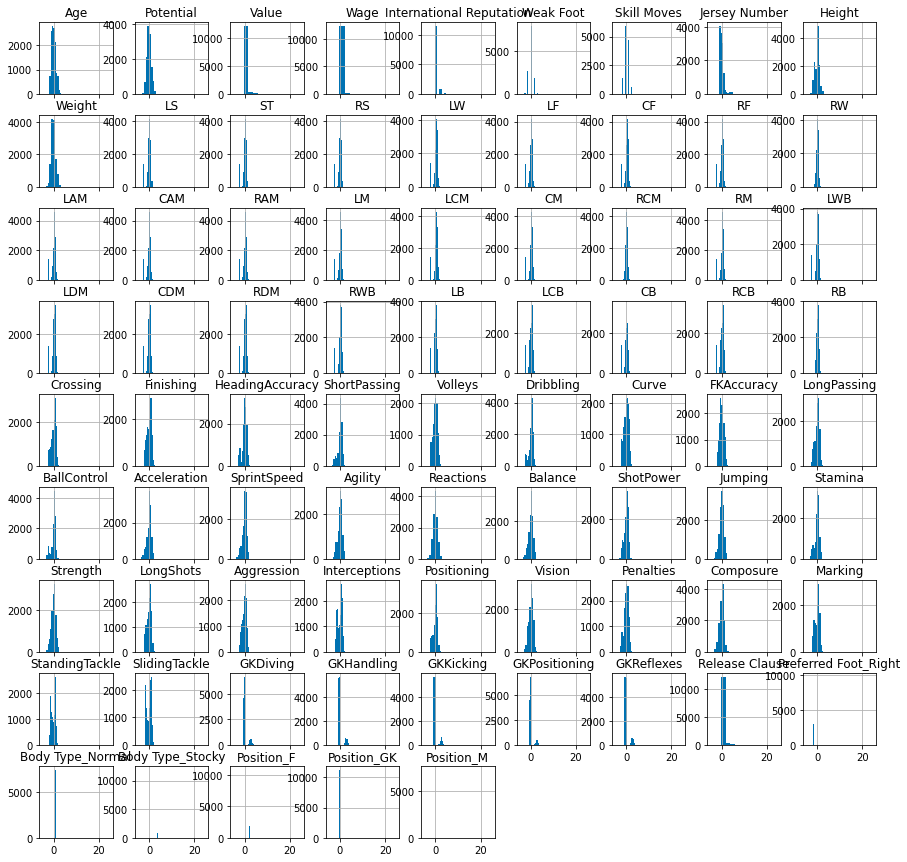

In [79]:
#Visualize using histogram
X_train_scaled.hist(figsize=(15,15), sharex=True)

In [80]:
#Show mean of the scaled data
X_train_scaled.mean()

Age                        -1.073972e-16
Potential                  -2.128496e-16
Value                      -2.181551e-16
Wage                        4.800827e-16
International Reputation   -3.010853e-16
                                ...     
Body Type_Normal            3.740425e-16
Body Type_Stocky           -1.664417e-15
Position_F                 -3.929483e-16
Position_GK                 9.666335e-16
Position_M                 -2.552237e-17
Length: 77, dtype: float64

In [81]:
#Show standard deviation of the scaled data
X_train_scaled.std()

Age                         1.000039
Potential                   1.000039
Value                       1.000039
Wage                        1.000039
International Reputation    1.000039
                              ...   
Body Type_Normal            1.000039
Body Type_Stocky            1.000039
Position_F                  1.000039
Position_GK                 1.000039
Position_M                  1.000039
Length: 77, dtype: float64

In [82]:
#Vector Normalization
X = fifa_final.drop('Overall', axis=1)
y = fifa_final['Overall']
# split the dataset into training dataset (70%) and testing dataset (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [83]:
vector_lens = np.round(np.linalg.norm(X_train, ord=2, axis=1), 1)
vector_lens

array([ 2024849.7,  2195458.1, 20933481. , ...,  1456242.2,   979576.6,
       11237892.4])

In [84]:
vector_lens.mean()

5252562.258360889

In [85]:
#fit and transform the normalizer
scaler = Normalizer(norm='l2')

In [86]:
#fit
scaler.fit(X_train)

Normalizer(copy=True, norm='l2')

In [87]:
#transform
X_train_norm = scaler.transform(X_train)

In [88]:
X_train_norm

array([[1.03711402e-05, 3.65459227e-05, 5.43250202e-01, ...,
        0.00000000e+00, 0.00000000e+00, 4.93863820e-07],
       [1.50310316e-05, 3.18840064e-05, 5.01034386e-01, ...,
        0.00000000e+00, 0.00000000e+00, 4.55485805e-07],
       [1.05094800e-06, 3.91716983e-06, 4.29933274e-01, ...,
        0.00000000e+00, 0.00000000e+00, 4.77703637e-08],
       ...,
       [1.37339795e-05, 5.08157241e-05, 5.66526654e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.65420803e-05, 6.83968992e-05, 5.35945852e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.13563177e-06, 6.94080325e-06, 4.89415614e-01, ...,
        0.00000000e+00, 0.00000000e+00, 8.89846571e-08]])

In [89]:
#Convert to dataframe
X_train_df = pd.DataFrame(X_train_norm, columns=X_train.columns)

In [90]:
X_train_df

,Age,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Preferred Foot_Right,Body Type_Normal,Body Type_Stocky,Position_F,Position_GK,Position_M
0,0.000010,0.000037,0.543250,0.001975,4.938638e-07,1.975455e-06,1.975455e-06,1.333432e-05,0.000034,0.000076,0.000030,0.000030,0.000030,0.000034,0.000033,0.000033,0.000033,0.000034,0.000033,0.000033,0.000033,0.000034,0.000031,0.000031,0.000031,0.000034,0.000028,0.000026,0.000026,0.000026,0.000028,0.000027,0.000022,0.000022,0.000022,0.000027,0.000031,0.000026,0.000018,0.000032,0.000029,0.000036,0.000037,0.000030,0.000030,0.000035,0.000040,0.000039,0.000038,0.000027,0.000040,0.000034,0.000030,0.000031,0.000021,0.000035,0.000026,0.000017,0.000028,0.000033,0.000029,0.000033,0.000014,0.000022,0.000020,4.444774e-06,3.457047e-06,5.432502e-06,7.407957e-06,3.950911e-06,0.839568,4.938638e-07,0.000000e+00,0.0,0.000000e+00,0.000000e+00,4.938638e-07
1,0.000015,0.000032,0.501034,0.002733,4.554858e-07,1.366457e-06,1.366457e-06,1.047617e-05,0.000030,0.000064,0.000029,0.000029,0.000029,0.000032,0.000031,0.000031,0.000031,0.000032,0.000032,0.000032,0.000032,0.000032,0.000031,0.000031,0.000031,0.000032,0.000029,0.000028,0.000028,0.000028,0.000029,0.000027,0.000023,0.000023,0.000023,0.000027,0.000035,0.000027,0.000016,0.000030,0.000025,0.000030,0.000035,0.000034,0.000033,0.000033,0.000034,0.000031,0.000038,0.000031,0.000041,0.000034,0.000027,0.000031,0.000014,0.000033,0.000035,0.000024,0.000029,0.000031,0.000028,0.000033,0.000020,0.000021,0.000020,6.832287e-06,3.188401e-06,5.010344e-06,4.554858e-06,4.099372e-06,0.865423,0.000000e+00,4.554858e-07,0.0,0.000000e+00,0.000000e+00,4.554858e-07
2,0.000001,0.000004,0.429933,0.001194,4.777036e-08,9.554073e-08,1.433111e-07,1.003178e-06,0.000003,0.000008,0.000003,0.000003,0.000003,0.000003,0.000004,0.000004,0.000004,0.000003,0.000004,0.000004,0.000004,0.000003,0.000004,0.000004,0.000004,0.000003,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000003,0.000003,0.000004,0.000004,0.000003,0.000003,0.000003,0.000003,0.000003,0.000004,0.000003,0.000003,0.000003,0.000004,0.000003,0.000004,0.000004,0.000004,0.000003,0.000003,0.000004,0.000004,0.000003,0.000003,0.000002,0.000004,0.000003,0.000004,0.000003,6.210147e-07,2.866222e-07,5.254740e-07,5.254740e-07,6.687851e-07,0.902860,4.777036e-08,4.777036e-08,0.0,0.000000e+00,0.000000e+00,4.777036e-08
3,0.000043,0.000102,0.480197,0.001601,1.600655e-06,4.801966e-06,3.201311e-06,4.962032e-05,0.000123,0.000304,0.000066,0.000066,0.000066,0.000059,0.000061,0.000061,0.000061,0.000059,0.000059,0.000059,0.000059,0.000062,0.000064,0.000064,0.000064,0.000062,0.000082,0.000083,0.000083,0.000083,0.000082,0.000086,0.000099,0.000099,0.000099,0.000086,0.000048,0.000040,0.000104,0.000059,0.000051,0.000054,0.000048,0.000037,0.000050,0.000061,0.000082,0.000086,0.000064,0.000082,0.000054,0.000058,0.000112,0.000090,0.000118,0.000030,0.000110,0.000088,0.000040,0.000051,0.000054,0.000078,0.000102,0.000104,0.000094,1.440590e-05,1.920787e-05,1.920787e-05,1.600655e-05,1.600655e-05,0.877159,1.600655e-06,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000001,0.000005,0.428652,0.002308,6.594647e-08,1.978394e-07,2.637859e-07,4.616253e-07,0.000005,0.000011,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000003,0.000003,0.000003,0.000004,0.000004,0.000005,0.

In [91]:
#Normalized length for each position
np.round(np.linalg.norm(X_train, ord=2, axis=1),1)

array([ 2024849.7,  2195458.1, 20933481. , ...,  1456242.2,   979576.6,
       11237892.4])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff85bf802b0>,
      dtype=object)

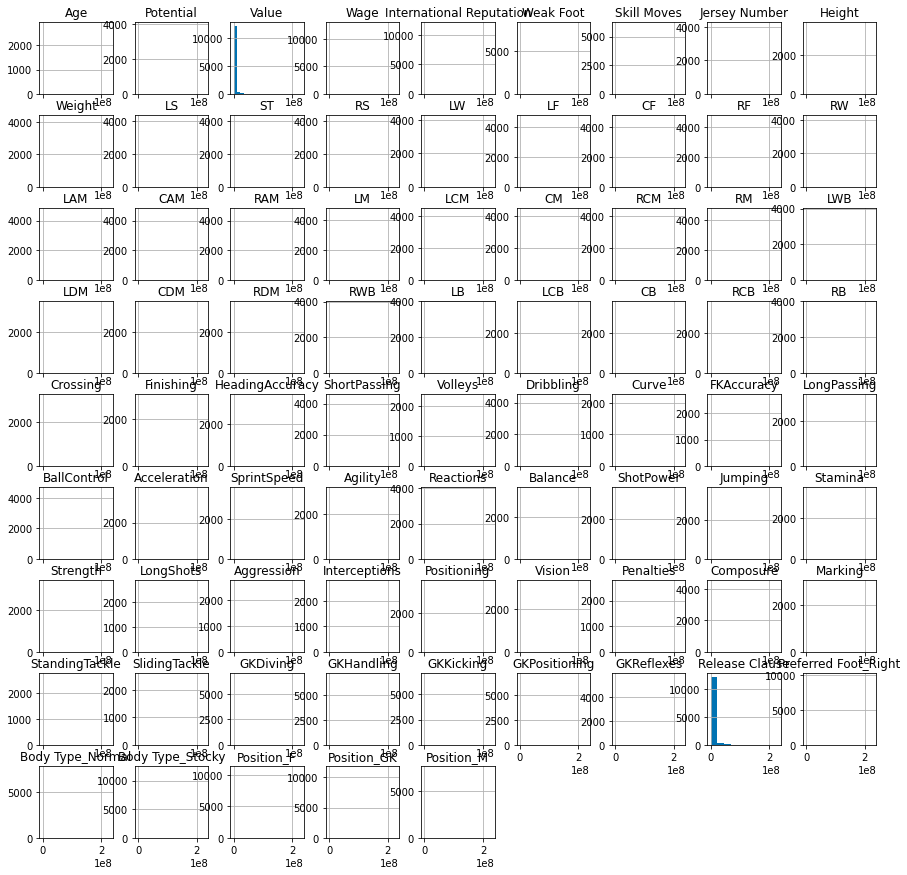

In [92]:
#visualize the unnormalized dataset
X_train.hist(sharex=True,figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff85a2454a8>,
      dtype=object)

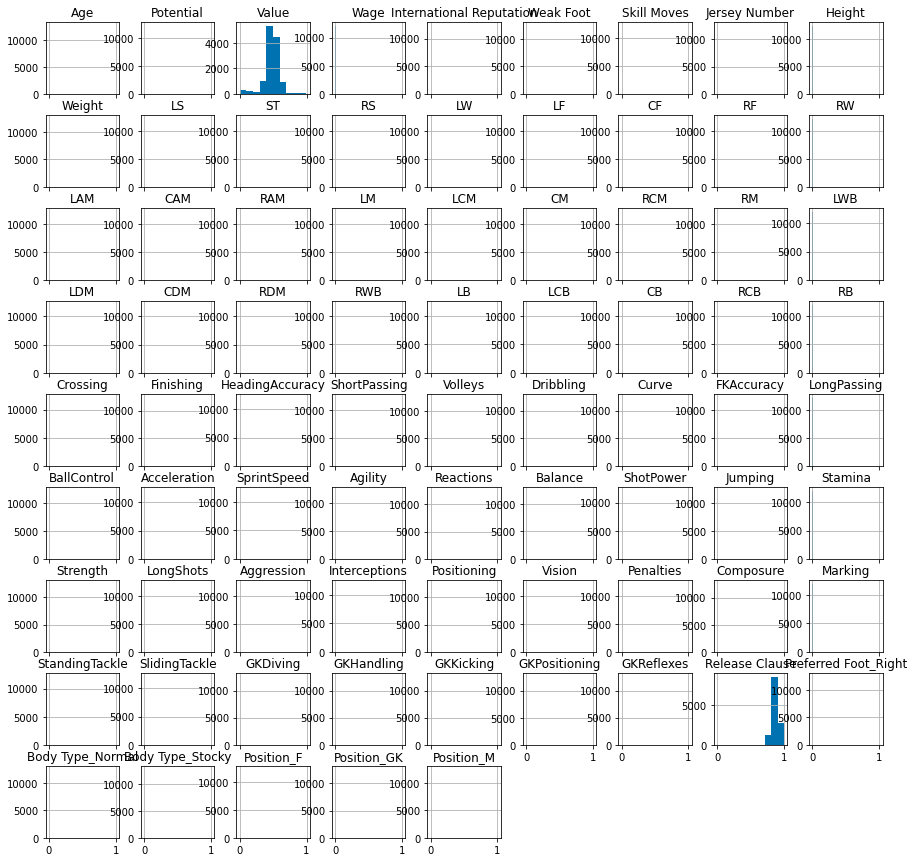

In [93]:
#visualize for normalized
X_train_df.hist(sharex=True, figsize=(15,15))

In [94]:
X_train_df.std()

Age                         7.970029e-05
Potential                   1.489652e-04
Value                       1.200549e-01
Wage                        3.509744e-03
International Reputation    2.602973e-06
                                ...     
Body Type_Normal            2.091928e-06
Body Type_Stocky            9.913653e-07
Position_F                  6.538297e-07
Position_GK                 2.048608e-06
Position_M                  1.244555e-06
Length: 77, dtype: float64

In [95]:
#Correlation based selection
fifa_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,18147.0,2.512112e+01,4.669796e+00,16.0,21.0,25.0,28.0,45.0
Overall,18147.0,6.625393e+01,6.913320e+00,46.0,62.0,66.0,71.0,94.0
Potential,18147.0,7.132408e+01,6.132286e+00,48.0,67.0,71.0,75.0,95.0
Value,18147.0,2.417729e+06,5.602826e+06,0.0,300000.0,675000.0,2000000.0,118500000.0
Wage,18147.0,9.759024e+03,2.203025e+04,0.0,1000.0,3000.0,9000.0,565000.0
...,...,...,...,...,...,...,...,...
Body Type_Normal,18147.0,5.835675e-01,4.929806e-01,0.0,0.0,1.0,1.0,1.0
Body Type_Stocky,18147.0,6.293051e-02,2.428446e-01,0.0,0.0,0.0,0.0,1.0
Position_F,18147.0,1.469664e-01,3.540822e-01,0.0,0.0,0.0,0.0,1.0
Position_GK,18147.0,1.115887e-01,3.148684e-01,0.0,0.0,0.0,0.0,1.0


In [96]:
#Split the data into features and target
X = fifa_final.drop('Overall', axis=1)
y = fifa_final['Overall']

In [97]:
y.value_counts(normalize=True)

66    0.064033
67    0.061553
64    0.060120
65    0.057530
68    0.056979
63    0.055216
69    0.053618
70    0.048934
62    0.045738
71    0.043148
72    0.041494
61    0.039180
60    0.035763
73    0.033504
74    0.029592
59    0.028930
75    0.027387
58    0.024467
57    0.022042
76    0.020554
56    0.018846
77    0.016752
55    0.014548
54    0.013666
53    0.010911
79    0.009423
78    0.009258
52    0.008762
80    0.007880
51    0.006888
50    0.005676
82    0.005180
81    0.005125
83    0.003857
84    0.002480
49    0.001984
85    0.001818
48    0.001763
86    0.001212
47    0.001102
88    0.000937
87    0.000716
89    0.000606
91    0.000331
90    0.000276
94    0.000110
92    0.000055
46    0.000055
Name: Overall, dtype: float64

In [98]:
#Get the Pearson correlation coefficient
fifa_final.corr(method='pearson')['Overall']

Age                 0.453354
Overall             1.000000
Potential           0.660947
Value               0.627025
Wage                0.571795
                      ...   
Body Type_Normal    0.045516
Body Type_Stocky    0.054129
Position_F          0.002269
Position_GK        -0.084613
Position_M          0.038525
Name: Overall, Length: 78, dtype: float64

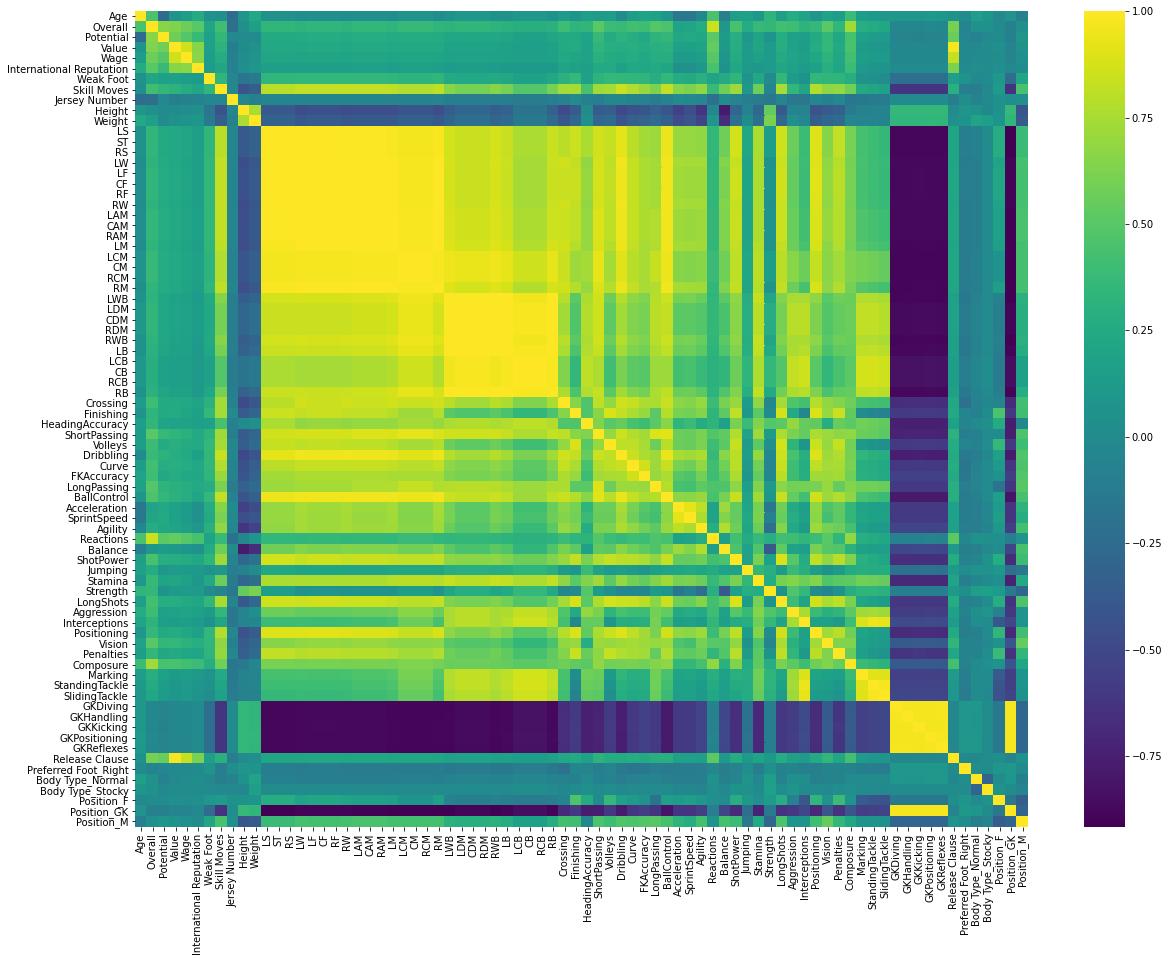

In [99]:
#Visualise using heatmap
plt.figure(figsize=(20,15))
sns.heatmap(fifa_final.corr(method='pearson'), cmap = 'viridis')

In [100]:
fifa_final.corr(method='pearson')['Overall'].abs() > 0.5

Age                 False
Overall              True
Potential            True
Value                True
Wage                 True
                    ...  
Body Type_Normal    False
Body Type_Stocky    False
Position_F          False
Position_GK         False
Position_M          False
Name: Overall, Length: 78, dtype: bool

In [101]:
#Retain Most corr features
most_corr = fifa_final.columns[fifa_final.corr(method='pearson')['Overall'].abs() > 0.5]
most_corr

Index(['Overall', 'Potential', 'Value', 'Wage', 'ShortPassing', 'Reactions',
       'Composure', 'Release Clause'],
      dtype='object')

In [102]:
#Convert it in a dataframe
df_reduced = fifa_final[most_corr]

In [103]:
df_reduced

,Overall,Potential,Value,Wage,ShortPassing,Reactions,Composure,Release Clause
0,94,94,110500000.0,565000.0,90.0,95.0,96.0,226500000.0
1,94,94,77000000.0,405000.0,81.0,96.0,95.0,127100000.0
2,92,93,118500000.0,290000.0,84.0,94.0,94.0,228100000.0
3,91,93,72000000.0,260000.0,50.0,90.0,68.0,138600000.0
4,91,92,102000000.0,355000.0,92.0,91.0,88.0,196400000.0
...,...,...,...,...,...,...,...,...
18202,47,65,60000.0,1000.0,49.0,49.0,45.0,143000.0
18203,47,63,60000.0,1000.0,43.0,40.0,42.0,113000.0
18204,47,67,60000.0,1000.0,38.0,47.0,41.0,165000.0
18205,47,66,60000.0,1000.0,42.0,21.0,46.0,143000.0


In [104]:
#Doing PCA
#Again, train the data after splitting them
X = fifa_final.drop('Overall', axis=1).values
y = fifa_final['Overall'].values

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [106]:
X_train.shape

(12702, 77)

In [107]:
#Import PCA from scikitlearn
from sklearn.decomposition import PCA

In [108]:
#Set up PCA
pca = PCA(n_components=None)

In [109]:
#fit and train with the training set
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0.5, 1.0, '% of Variance Explained')

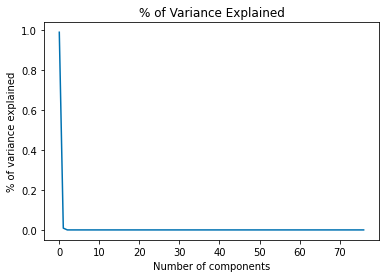

In [110]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('% of variance explained')
plt.title('% of Variance Explained')

Text(0.5, 1.0, '% of Variance Explained')

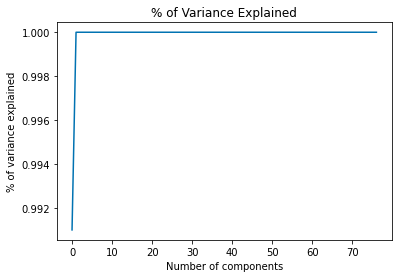

In [111]:
#Get the cumulative sum and plot
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of components')
plt.ylabel('% of variance explained')
plt.title('% of Variance Explained')

In [112]:
#transform the training and test data
X_train_trans = pca.transform(X_train)

In [113]:
X_test_trans = pca.transform(X_test)

In [114]:
X_train_trans

array([[-3.18406918e+06,  1.60194579e+05, -1.34274843e+03, ...,
         1.52305928e-10,  1.41661731e-10,  2.80648908e-10],
       [-3.00648691e+06,  6.81922710e+04,  6.85106099e+02, ...,
         1.39812900e-10,  1.30564591e-10,  2.69546118e-10],
       [ 1.57221026e+07, -7.38180101e+05, -7.00215535e+03, ...,
        -7.49606929e-10, -6.97425530e-10, -1.38866849e-09],
       ...,
       [-3.75452862e+06,  1.46047401e+05, -4.00962547e+02, ...,
         1.77550269e-10,  1.65393867e-10,  3.33300662e-10],
       [-4.22372636e+06,  5.12772923e+04,  6.50439333e+02, ...,
         1.94293206e-10,  1.81703484e-10,  3.81125671e-10],
       [ 6.03208864e+06,  3.40581571e+05, -5.39712428e+03, ...,
        -2.57616588e-10, -2.43541382e-10, -5.66957970e-10]])

In [115]:
X_test_trans

array([[-4.98701940e+06,  1.88034158e+03, -9.88053192e+02, ...,
         2.26593636e-10,  2.12278488e-10,  4.53203014e-10],
       [-2.51332069e+06,  1.50531180e+05, -3.36253371e+03, ...,
         1.21375825e-10,  1.12751289e-10,  2.20218258e-10],
       [-9.21466572e+05, -1.74419763e+06, -5.50348196e+02, ...,
        -4.20043789e-11, -2.80047220e-11,  1.79305592e-10],
       ...,
       [-3.98263777e+06,  2.07916627e+05, -2.24922509e+03, ...,
         1.90870302e-10,  1.77488704e-10,  3.50636534e-10],
       [-4.85673972e+06, -2.05630713e+04,  8.82386557e+02, ...,
         2.19610100e-10,  2.05862811e-10,  4.42603991e-10],
       [-2.16459703e+06, -4.80644840e+05,  1.92132017e+02, ...,
         7.51927404e-11,  7.35824621e-11,  2.23102743e-10]])

In [116]:
#We can reduce the dimension of our training data
X_train_trans_df = pd.DataFrame(X_train_trans[:,0:2])

In [117]:
X_train_trans_df

,0,1
0,-3.184069e+06,1.601946e+05
1,-3.006487e+06,6.819227e+04
2,1.572210e+07,-7.381801e+05
3,-4.574963e+06,-2.015531e+04
4,9.954955e+06,-5.656373e+05
...,...,...
12697,-3.935320e+06,1.448731e+04
12698,-9.674724e+05,-1.832990e+06
12699,-3.754529e+06,1.460474e+05
12700,-4.223726e+06,5.127729e+04


In [118]:
#Thanks for you patience ^^